In [25]:
# Import requests package
import requests

# Assign URL to variable
url = 'http://www.omdbapi.com/?t=Gladiator&apikey=ff21610b'

# Package the request, send the request and catch the response
r = requests.get(url)

# Print the (html) text of the response
print(r.text)

print(type(r))

print(r)

{"Title":"Gladiator","Year":"2000","Rated":"R","Released":"05 May 2000","Runtime":"155 min","Genre":"Action, Adventure, Drama","Director":"Ridley Scott","Writer":"David Franzoni (story), David Franzoni (screenplay), John Logan (screenplay), William Nicholson (screenplay)","Actors":"Russell Crowe, Joaquin Phoenix, Connie Nielsen, Oliver Reed","Plot":"When a Roman General is betrayed, and his family murdered by an emperor's corrupt son, he comes to Rome as a gladiator to seek revenge.","Language":"English","Country":"USA, UK","Awards":"Won 5 Oscars. Another 53 wins & 101 nominations.","Poster":"https://images-na.ssl-images-amazon.com/images/M/MV5BMDliMmNhNDEtODUyOS00MjNlLTgxODEtN2U3NzIxMGVkZTA1L2ltYWdlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.5/10"},{"Source":"Rotten Tomatoes","Value":"76%"},{"Source":"Metacritic","Value":"67/100"}],"Metascore":"67","imdbRating":"8.5","imdbVotes":"1,097,695","imdbID":"tt0172495","Type":"movie","

In [26]:
# Decode the JSON data into a dictionary
json_data = r.json()
print(type(json_data))

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

<class 'dict'>
Title:  Gladiator
Year:  2000
Rated:  R
Released:  05 May 2000
Runtime:  155 min
Genre:  Action, Adventure, Drama
Director:  Ridley Scott
Writer:  David Franzoni (story), David Franzoni (screenplay), John Logan (screenplay), William Nicholson (screenplay)
Actors:  Russell Crowe, Joaquin Phoenix, Connie Nielsen, Oliver Reed
Plot:  When a Roman General is betrayed, and his family murdered by an emperor's corrupt son, he comes to Rome as a gladiator to seek revenge.
Language:  English
Country:  USA, UK
Awards:  Won 5 Oscars. Another 53 wins & 101 nominations.
Poster:  https://images-na.ssl-images-amazon.com/images/M/MV5BMDliMmNhNDEtODUyOS00MjNlLTgxODEtN2U3NzIxMGVkZTA1L2ltYWdlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '8.5/10'}, {'Source': 'Rotten Tomatoes', 'Value': '76%'}, {'Source': 'Metacritic', 'Value': '67/100'}]
Metascore:  67
imdbRating:  8.5
imdbVotes:  1,097,695
imdbID:  tt0172495
Type:  movie
DVD:  21 Nov 2

In [30]:
# Assign URL to variable
# Remove "exintro=" to pull content of entire page
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=Roger+Federer|tennis'

# Package the request, send the request and catch the response
r = requests.get(url)

# Decode the JSON data into a dictionary (really, NESTED dictionaries)
json_data = r.json()

# Print the Wikipedia page extract
print(json_data['query']['pages']['262376']['extract'])

print(json_data['query']['pages']['29773']['extract'])

#print(json_data)

<p><b>Roger Federer</b> (<small>German pronunciation:</small> <span title="Representation in the International Phonetic Alphabet (IPA)">[ˈrɔdʒər ˈfeːdərər]</span>; born 8 August 1981) is a Swiss professional tennis player who is currently ranked world No. 2 in men's singles tennis by the Association of Tennis Professionals (ATP). Federer has won 19 Grand Slam singles titles, the most in history for a male tennis player and has held the world No. 1 spot in the ATP rankings for a record total of 302 weeks, including a record 237 consecutive weeks. After turning professional in 1998, he was continuously ranked in the top ten from October 2002 to November 2016. He re-entered the top ten by his victory at the 2017 Australian Open.</p>
<p>In majors, he has won a record eight Wimbledon titles, five Australian Open titles, a record five consecutive US Open titles and one French Open title. He is among eight men to have captured a career Grand Slam and has reached a record 29 men's singles Gran

# Twitter streaming API

In [1]:
import tweepy, json

# Store OAuth authentication credentials in relevant variables
access_token = "886614526027870209-jeeJLxa33IJ9vKR3seOZKjusljJLZ5q"
access_token_secret = "sPC1hP6t47xuzCi4RjLzLtXLa8dG8cTLyLBENnA326JW3"
consumer_key = "qzl18bdauXfSVsfJWLcikvxqJ"
consumer_secret = "pOyftjL8S676P8IpQWIwU2TkH3lSWwjz6G4O8yAU1NJwxS98EO"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [2]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [3]:
# Initialize Stream listener
l = MyStreamListener()

# Create Stream object with authentication
stream = tweepy.Stream(auth,l)

# Filter Twitter Streams to capture data by keywords; does capitalization matter?
stream.filter(track = ['federer','nadal','djokovic'])

In [4]:
# Initialize empty list to store tweets
tweets_data = []

# Open connection to file, or could do context manager
tweets_file = open('tweets.txt', "r")

# Read in tweets and store in list
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of json/dict for first tweet
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


In [5]:
import pandas as pd

# Build DataFrame of tweet texts, users, and times
tweets_df = pd.DataFrame(tweets_data, columns=['text','created_at','lang'])

print(tweets_df.head())
print(tweets_df.info())

                                                text  \
0  Djokovic confirma presença no Aberto da Austrá...   
1  Those awesome pics of Rafa! https://t.co/NlIIb...   
2  RT @jordialapreso: Avui s’acaben les festes de...   
3  RT @Dalinda_RF: Roger Federer: "My son,my othe...   
4  Federer võidutses 17-aastase vahe järel Hopman...   

                       created_at lang  
0  Sun Jan 07 05:15:01 +0000 2018   es  
1  Sun Jan 07 05:15:12 +0000 2018   en  
2  Sun Jan 07 05:15:41 +0000 2018  und  
3  Sun Jan 07 05:15:43 +0000 2018   en  
4  Sun Jan 07 05:15:51 +0000 2018   et  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
text          100 non-null object
created_at    100 non-null object
lang          100 non-null object
dtypes: object(3)
memory usage: 2.4+ KB
None


In [6]:
import re

def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    else:
        return False

In [8]:
# Initialize list to store tweet counts
[federer, nadal, djokovic] = [0, 0, 0]

# Iterate through tweets_df, counting the number of tweets in which each person is mentioned
for index, row in tweets_df.iterrows():
    federer += word_in_text('Federer', row['text'])
    nadal += word_in_text('Nadal', row['text'])
    djokovic += word_in_text('Djokovic', row['text'])
    
print([federer, nadal, djokovic])

[6, 3, 0]


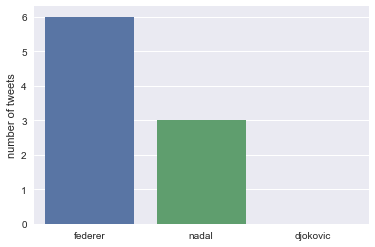

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels
cd = ['federer', 'nadal', 'djokovic']

# Plot histogram
ax = sns.barplot(cd,[federer, nadal, djokovic])
ax.set(ylabel="number of tweets")
plt.show()

In [47]:
import requests
url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=1'

In [48]:
# Package the request, send the request and catch the response
r = requests.get(url)

# Print the (xml) text of the response
# print(r.text)

In [49]:
import xmltodict, json

o = xmltodict.parse(r.text)
j_string = json.dumps(o)
j_file = json.loads(j_string)
print(j_file['feed']['entry']['title'])

Impact of Electron-Electron Cusp on Configuration Interaction Energies


In [66]:
url = 'http://export.arxiv.org/api/query?search_query=cat:math.AG&start=0&max_results=2'

In [67]:
# Package the request, send the request and catch the response
r = requests.get(url)

In [70]:
o = xmltodict.parse(r.text)
j_string = json.dumps(o)
j_file = json.loads(j_string)
print(j_file['feed']['entry'])

[{'id': 'http://arxiv.org/abs/math/9204225v1', 'updated': '1992-04-01T00:00:00Z', 'published': '1992-04-01T00:00:00Z', 'title': 'Higgs line bundles, Green-Lazarsfeld sets,and maps of Kähler manifolds\n  to curves', 'summary': 'Let $X$ be a compact K\\"ahler manifold. The set $\\cha(X)$ of one-dimensional\ncomplex valued characters of the fundamental group of $X$ forms an algebraic\ngroup. Consider the subset of $\\cha(X)$ consisting of those characters for\nwhich the corresponding local system has nontrivial cohomology in a given\ndegree $d$. This set is shown to be a union of finitely many components that\nare translates of algebraic subgroups of $\\cha(X)$. When the degree $d$ equals\n1, it is shown that some of these components are pullbacks of the character\nvarieties of curves under holomorphic maps. As a corollary, it is shown that\nthe number of equivalence classes (under a natural equivalence relation) of\nholomorphic maps, with connected fibers, of $X$ onto smooth curves of a 

# ArXiv API: parsing and paging

In [72]:
import urllib.request
import feedparser

In [31]:
# Base api query url
base_url = 'http://export.arxiv.org/api/query?'

# Search parameters
search_query = 'cat:math.AP'
start = 0                     # retrieve the first 10 results
max_results = 10

query = 'search_query=%s&start=%i&max_results=%i' % (search_query, start, max_results)

In [32]:
# perform a GET request using the base_url and query
# response = requests.get(base_url+query)

response = urllib.request.urlopen(base_url+query)

# parse the response using feedparser
feed = feedparser.parse(response)

In [35]:
for entry in feed.entries:
#    print('e-print metadata')
#    print 'arxiv-id: %s' % entry.id.split('/abs/')[-1]
#    print 'Published: %s' % entry.published
    print('Title: %s' % entry.title)

Title: Some non-analytic-hypoelliptic sums of squares of vector fields
Title: A steepest descent method for oscillatory Riemann-Hilbert problems
Title: Semilinear wave equations
Title: A sharp pointwise bound for functions with $L^2$-Laplacians on arbitrary
  domains and its applications
Title: user's guide to viscosity solutions of second order partial differential
  equations
Title: Smooth static solutions of the Einstein-Yang/Mills equation
Title: A new result for the porous medium equation derived from the Ricci flow
Title: A Formula for Finding a Potential from Nodal Lines
Title: Local Solvability For a Class of Partial Differential Operators With
  Double Characteristics
Title: Global Irregularity For Degenerate Elliptic Operators


In [91]:
import time

# Base api query url
base_url = 'http://export.arxiv.org/api/query?'

# Search parameters
search_query = 'cat:math.AG'
start = 0                       # start at the first result
total_results = 500              # want 20 total results
results_per_iteration = 25       # 5 results at a time
wait_time = 3                   # number of seconds to wait between calls

print('Searching arXiv for %s' % search_query)

titles_list = []

for i in range(start,total_results,results_per_iteration):
    
#    print("Results %i - %i" % (i,i+results_per_iteration))
    
    query = 'search_query=%s&start=%i&max_results=%i' % (search_query,
                                                         i,
                                                        results_per_iteration)

    # perform a GET request using the base_url and query
    response = urllib.request.urlopen(base_url+query)

    # parse the response using feedparser
    feed = feedparser.parse(response)

    # Run through each entry, and print out title
    for entry in feed.entries:
#        print 'arxiv-id: %s' % entry.id.split('/abs/')[-1]
#        print(entry.title)
        titles_list.append(entry.title.replace('\n ',''))
    
    # Remember to play nice and sleep a bit before you call the api again!
#    print('Sleeping for %i seconds' % wait_time)
    time.sleep(wait_time)

Searching arXiv for cat:math.AG
Higgs line bundles, Green-Lazarsfeld sets,and maps of Kähler manifolds
  to curves
A theory of algebraic cocycles
Zariski Geometries
Configuration spaces and the space of rational curves on a toric variety
Stable vector bundles on algebraic surfaces
Toric Intersection Theory for Affine Root Counting
On Hyper Kähler manifolds associated to Lagrangean Kähler
  submanifolds of $T^*{\Bbb C}^n$
Rational curves and ampleness properties of the tangent bundle of
  algebraic varieties
Quantum cohomology of projective bundles over P^n
Extensions of vector bundles and rationality of certain moduli spaces of
  stable bundles
Rank-3 stable bundles on rational ruled surfaces
Topological arrangement of curves of degree 6 on cubic surfaces in $\Bbb
  R P^3$
Adjunction inequality for real algebraic curves
Subspace Arrangements over Finite Fields: Cohomological and Enumerative
  Properties
On Rigidity and the Albanese Variety for Parallelizable Manifolds
Flat Vector Bundl

A remark on algebraic surfaces with polyhedral Mori cone
A formula for the Euler characteristic of $\bar{\cal M}_{2,n}$
Quotients of Toric Varieties by the Action of a Subtorus
The locus of log canonical singularities
The tensor product in the theory of Frobenius manifolds
The Bogomolov--Pantev resolution, an expository account
On the Instanton Complex of Holomorphic Morse Theory
On branched coverings of some homogeneous spaces
Rational curves on hypersurfaces [after A. Givental]
Essentials of the method of maximal singularities
Seshadri constants and periods of polarized abelian varieties
Line bundles for which a projectivized jet bundle is a product
Cyclic coverings and higher order embeddings of algebraic varieties
Invariants de Von Neumann des faisceaux coherents
Effective base point freeness on normal surfaces
Triple canonical surfaces of minimal degree
Surfaces elliptiques réelles et inégalité de Ragsdale-Viro
Structures de contact sur les variétés toriques
Logarithmic differenti

Riemannian Holonomy and Algebraic Geometry
Some adjunction properties of ample vector bundles
Cup products and mixed Hodge structures
Restriction of the Poincaré bundle to a Calabi-Yau hypersurface
Towards a Mori theory on compact Kaehler threefolds, III
New Invariants for surfaces
Geometry of Pinchuk's map
Hessian quartic surfaces that are Kummer surfaces
Applications of Kawamata's positivity theorem
Base point free theorem of Reid-Fukuda type
Boundedness of Q-Fano varieties of Picard number one
Focal loci of families and the genus of curves on surfaces
Addendum to: On fibre space structures of a projective irreducible
  symplectic manifold
On infinitesimal deformations and obstructions for rational surface
  singularities
The Adjunction Conjecture and its applications
Bogomolov's Conjecture for Hyperelliptic Curves over Function Fields
Symplectic singularities
Seshadri constants on algebraic surfaces
Espaces abstraits de morphismes et mutations II
On local uniformization in arbitrary

Notes on Perverse Sheaves and Vanishing Cycles
Compactifying the space of stable maps
Topology of algebraic varieties
Pluricanonical systems of projective varieties of general type
The indices of log canonical singularities
Kummer Covers with Many Points
Numerical bounds of canonical varieties
Lower bounds of the slope of fibred threefolds
On Bohr-Sommerfeld bases
How to calculate A-Hilb C^3
The Gauss map and a noncompact Riemann-Roch formula for constructible
  sheaves on semiabelian varieties
On Nagata's Conjecture
The Kaehler cone of a compact hyperkaehler manifold
Contact formulas for rational plane curves via stable maps
Coble Rational Surfaces
On codimension two subvarieties of P6
Classification of Plane Congruences in P4(C) (I)
Classification of Plane Congruences in P4(C) (II)
Spectral curves and Nahm transform for doubly-periodic instantons
Euler characteristics of local systems on $\mathcal{M}_2$
Calabi-Yau threefolds of quotient type
Igusa's local zeta functions of semiquasih

In [92]:
print(titles_list)

['Higgs line bundles, Green-Lazarsfeld sets,and maps of Kähler manifolds to curves', 'A theory of algebraic cocycles', 'Zariski Geometries', 'Configuration spaces and the space of rational curves on a toric variety', 'Stable vector bundles on algebraic surfaces', 'Toric Intersection Theory for Affine Root Counting', 'On Hyper Kähler manifolds associated to Lagrangean Kähler submanifolds of $T^*{\\Bbb C}^n$', 'Rational curves and ampleness properties of the tangent bundle of algebraic varieties', 'Quantum cohomology of projective bundles over P^n', 'Extensions of vector bundles and rationality of certain moduli spaces of stable bundles', 'Rank-3 stable bundles on rational ruled surfaces', 'Topological arrangement of curves of degree 6 on cubic surfaces in $\\Bbb R P^3$', 'Adjunction inequality for real algebraic curves', 'Subspace Arrangements over Finite Fields: Cohomological and Enumerative Properties', 'On Rigidity and the Albanese Variety for Parallelizable Manifolds', 'Flat Vector 

In [85]:
with open('titles_test.csv','w') as file:
    for title in titles_list:
        file.write(title)
        file.write('\n')

In [90]:
import pandas as pd

titles_df = pd.read_csv('titles_test.csv', header = None, names = ['title'])

print(titles_df)

                                                title
0   Some non-analytic-hypoelliptic sums of squares...
1   A steepest descent method for oscillatory Riem...
2                           Semilinear wave equations
3   A sharp pointwise bound for functions with $L^...
4   user's guide to viscosity solutions of second ...
5   Smooth static solutions of the Einstein-Yang/M...
6   A new result for the porous medium equation de...
7   A Formula for Finding a Potential from Nodal L...
8   Local Solvability For a Class of Partial Diffe...
9   Global Irregularity For Degenerate Elliptic Op...
10  Infinite dimensional families of locally nonso...
11  The monodromy matrix for a family of almost pe...
12          Low regularity semi-linear wave equations
13  Variational evolution problems and nonlocal ge...
14  Complete Integrability of Completely Integrabl...
15  Action-Angle variables for the Gel'fand-Dikii ...
16  Transition operators of diffusions reduce zero...
17  On a singular limit prob